In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.callbacks import *

In [3]:
torch.cuda.is_available()

True

In [4]:
get_transforms?

In [5]:
tfms = get_transforms(do_flip=True,flip_vert=False,max_rotate=10.0,max_zoom=1.1,max_lighting=0.2,max_warp=0.2,p_affine=0.75,p_lighting=0.75)


In [6]:
np.random.seed(42)


In [7]:
# from pathlib import Path
# path = Path("train/")

# print(path)
# for c in data.classes:
#     print(c)
#     verify_images(path/c, delete=True)

In [8]:
class FocalLoss(nn.Module):
    def __init__(self, alpha=1., gamma=1.):
        super().__init__()
        self.alpha = alpha
        self.gamma = gamma

    def forward(self, inputs, targets, **kwargs):
        CE_loss = nn.CrossEntropyLoss(reduction='none')(inputs, targets)
        pt = torch.exp(-CE_loss)
        F_loss = self.alpha * ((1-pt)**self.gamma) * CE_loss
        return F_loss.mean()

In [9]:
src = (ImageList.from_folder(path='train',include=["class-1625","class-597","class-526","class-857","class-771","class-1059","class-543"]).split_by_rand_pct(0.2).label_from_folder())

In [10]:
src

LabelLists;

Train: LabelList (9776 items)
x: ImageList
Image (3, 500, 375),Image (3, 500, 375),Image (3, 375, 500),Image (3, 375, 500),Image (3, 334, 500)
y: CategoryList
class-1059,class-1059,class-1059,class-1059,class-1059
Path: train;

Valid: LabelList (2443 items)
x: ImageList
Image (3, 600, 800),Image (3, 500, 375),Image (3, 300, 500),Image (3, 2000, 1500),Image (3, 800, 533)
y: CategoryList
class-771,class-857,class-1625,class-771,class-857
Path: train;

Test: None

In [11]:
data = src.transform(tfms,size=(512,512)).databunch(bs=4).normalize(imagenet_stats)

In [12]:
data.c

7

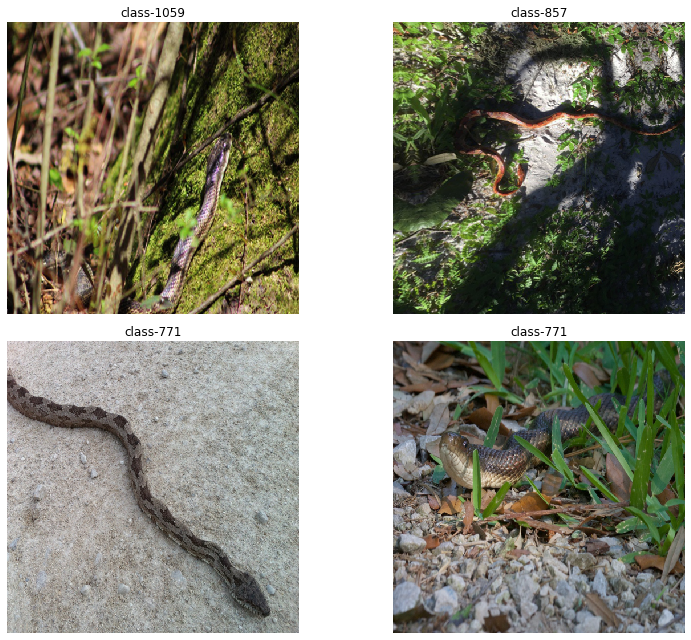

In [13]:
data.show_batch(rows=3, figsize=(12,9))

In [14]:
loss_func = FocalLoss(gamma=2.)

In [15]:
learn = cnn_learner(data, models.densenet161, metrics=[error_rate, accuracy, FBeta(beta=1,average='macro')],loss_func=loss_func)


In [16]:
learn

Learner(data=ImageDataBunch;

Train: LabelList (9776 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
class-1059,class-1059,class-1059,class-1059,class-1059
Path: train;

Valid: LabelList (2443 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
class-771,class-857,class-1625,class-771,class-857
Path: train;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Sequential(
      (conv0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (norm0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu0): ReLU(inplace)
      (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (denseblock1): _DenseBlock(
        (denselayer1): _DenseLayer(
          (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True,

In [17]:
learn.loss_func

FocalLoss()

In [18]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


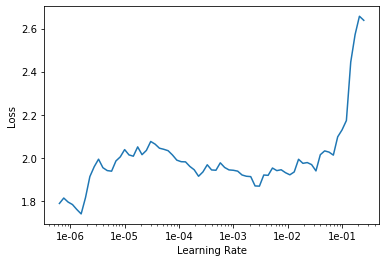

In [19]:
learn.recorder.plot()

In [28]:
lr=1e-4

In [29]:
learn.fit_one_cycle(2,lr)

epoch,train_loss,valid_loss,error_rate,accuracy,f_beta,time
0,1.017923,0.742681,0.413017,0.586983,0.532961,20:17
1,0.883318,0.556038,0.349980,0.650020,0.585850,20:03


In [ ]:
learn.fit_one_cycle(5,slice(1e-8,lr/10))

epoch,train_loss,valid_loss,error_rate,accuracy,f_beta,time
0,0.910625,0.545139,0.347114,0.652886,0.585998,20:05
1,0.822954,0.501818,0.326238,0.673762,0.608861,19:56
2,0.813222,0.489807,0.322145,0.677855,0.618619,20:04


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)


In [ ]:
interp.plot_confusion_matrix(figsize=(20,20), dpi=60)


In [ ]:
interp.plot_confusion_matrix(figsize=(20,20), dpi=60,normalize=True)

In [ ]:
interp.most_confused(min_val=2)
